In [8]:
import numpy as np
from lab.classifiers.kfingerprinting import ALL_DEFAULT_FEATURES
from pathlib import Path
import pathlib
import pandas as pd
import json
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from lab import tracev2

DIRECTORY = f"../../results/debug/buflo/"
# DIRECTORY = f"../../results/delay-vs-drop/tamaraw/delay.300mult/"
feature_names = np.array(ALL_DEFAULT_FEATURES)
# %matplotlib widget

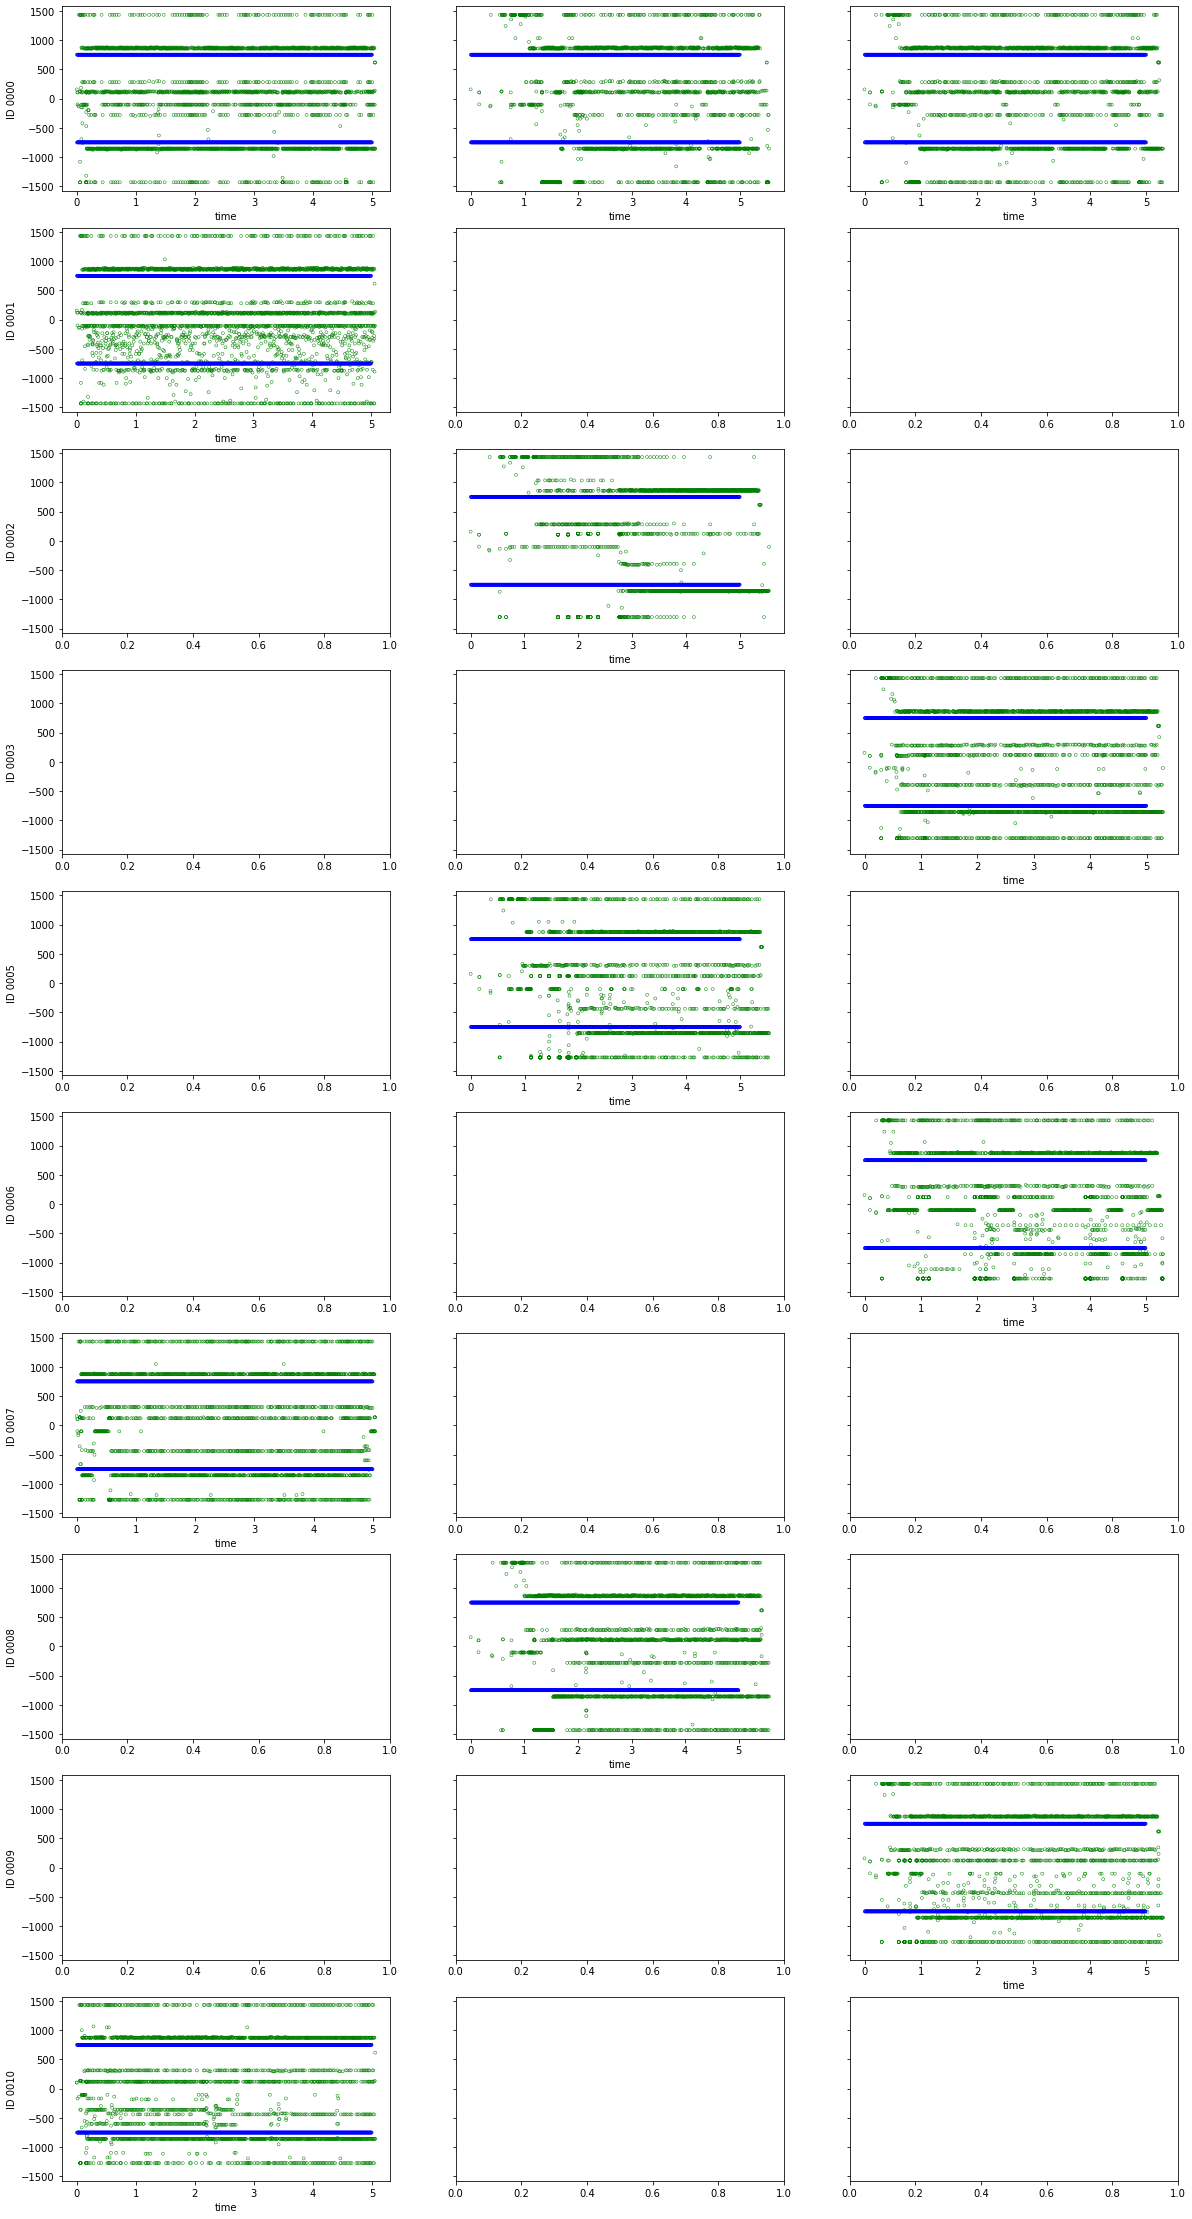

In [14]:
fig, ax = plt.subplots(10, 3, sharex=False, sharey=True, figsize=(20, 40))

for i, id_ in enumerate([0, 1, 2, 3, 5, 6, 7, 8, 9, 10]):
    for region in range(3):
        try:
            # trace_data = pd.DataFrame(tracev2.from_csv(Path(DIRECTORY, "dataset", f"{id_:04d}", f"{region}_0", "trace.csv")))
            trace_data = pd.DataFrame(tracev2.from_csv(Path(DIRECTORY, "dataset", f"{id_:04d}", f"{region}_0", "trace.csv")))
            # trace_data = trace_data[trace_data["size"].abs() > 150]
            sns.scatterplot(data=trace_data, x="time", y="size", ax=ax[i, region], marker='.', edgecolor="green", facecolor="none")
            trace_data = pd.DataFrame(tracev2.from_csv(Path(DIRECTORY, "dataset", f"{id_:04d}", f"{region}_0", "schedule.csv")))
            sns.scatterplot(data=trace_data, x="time", y="size", ax=ax[i, region], marker='.', edgecolor="blue", facecolor="none")
        except OSError as err:
            continue
    ax[i, 0].set_ylabel(f"ID {id_:04d}")
fig.savefig("/tmp/traces.jpg", bbox_inches="tight", dpi=150)